In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

((25000,), (25000,), (25000,), (25000,))

In [3]:
print( y_train[50], x_train[50])

0 [1, 13, 165, 219, 14, 20, 33, 6, 750, 17, 515, 17, 13, 2675, 4, 2, 61, 278, 59, 301, 107, 715, 13, 69, 115, 557, 33, 6, 750, 159, 42, 237, 57, 2, 17, 515, 17, 13, 557, 148, 715, 13, 144, 28, 43, 2, 5458, 5458, 8, 61, 2208, 5, 825, 344, 21, 57, 2, 13, 435, 11, 5, 296, 4, 20, 14, 20, 161, 97, 259, 11, 4, 750, 462, 24, 60, 280, 24, 60, 2, 669, 75, 1829, 50, 11, 5023, 3542, 175, 747, 234, 42, 38, 294, 62, 7799, 14, 20, 1870, 4, 311, 62, 6144, 2, 95, 870, 50, 11, 5023, 1100, 3542, 18, 160, 747, 234]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(113, 486, 160)

# Data preprocessing

In [5]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [6]:
pad_x_train = pad_make(x_train)

In [7]:
pad_x_test = pad_make(x_test)

In [8]:
import numpy as np

np.unique(y_train).shape, np.unique(y_train)

((2,), array([0, 1]))

# Make model

In [12]:
model = tf.keras.models.Sequential()

# Input Layer
model.add(tf.keras.layers.Embedding(input_dim=10000, output_dim=24, input_length=500))

# Hidden Layer
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))

# Output Layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 


# Gadget
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) 

In [17]:
hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=256)

Epoch 1/5
69/69 [==============================] - 52s 748ms/step - loss: 0.0930 - acc: 0.9754 - val_loss: 0.4120 - val_acc: 0.8653
Epoch 2/5
69/69 [==============================] - 52s 755ms/step - loss: 0.0831 - acc: 0.9790 - val_loss: 0.4403 - val_acc: 0.8715
Epoch 3/5
69/69 [==============================] - 52s 756ms/step - loss: 0.0713 - acc: 0.9827 - val_loss: 0.4776 - val_acc: 0.8711
Epoch 4/5
69/69 [==============================] - 52s 748ms/step - loss: 0.0706 - acc: 0.9823 - val_loss: 0.4712 - val_acc: 0.8679
Epoch 5/5
69/69 [==============================] - 51s 741ms/step - loss: 0.0617 - acc: 0.9858 - val_loss: 0.5061 - val_acc: 0.8688


# Evaluation

In [18]:
model.evaluate(pad_x_train, y_train)

782/782 [==============================] - 49s 62ms/step - loss: 0.1875 - acc: 0.9535


[0.18754808604717255, 0.9534800052642822]

In [19]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 48s 62ms/step - loss: 0.5762 - acc: 0.8491


[0.5762094259262085, 0.849120020866394]

In [20]:
import matplotlib.pyplot as plt

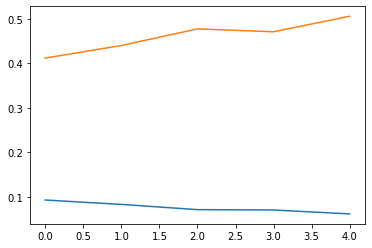

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

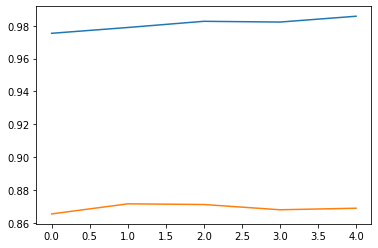

In [22]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [23]:
from sklearn.metrics import classification_report

In [24]:
y_train_pred = model.predict(pad_x_train)

In [25]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(25000,)

In [26]:
len(y_train)

25000

In [29]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_test_pred = model.predict(pad_x_test)

In [31]:
y_pred = np.argmax(y_test_pred, axis=1)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     12500
           1       0.00      0.00      0.00     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
